## Logistic Regression Homework 
For each pair of 2 digits, (digit_0, digit_1) in the set {(0, 1), (2,7), (3, 4), (8,9)}, do the following:
1. Given the data retrieval method get_mnist_data, select the train and test data corresponding to just the two digits.
2. Using cross-fold validation with a number of 5 folds, compute the performance for each logistic regression probability threshold t in [0, 1] with 0.05 increments. Show the curve of accuracy performance for these values (similar to the display made during the logistic regression course).
3. Choose the best performing threshold, t_best. Train a logistic regression model on the entire train dataset and then set the threshold parameter for the resulting model to t_best.
4. Evaluate the trained model on the test data (remember, this has to be filtered as well).
5. Choose 5 well classified examples from the test data set. Using the methods provided below (viewSquareImage or viewImageByIndex), display the images and labels for each.
6. Do the same for 5 misclassified examples.
7. Display a gray scale image showing the weight of each pixel in the trained model.


In [1]:
import numpy as np
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

def get_mnist_data():
    import os
    from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return data / np.float32(256)

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data


    x_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    x_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')
    
    data = {'train': {'X': x_train[0:,0,0:28,0:28].reshape((x_train.shape[0],-1)),
                      'y': y_train},
            'test': {'X': x_test[0:,0,0:28,0:28].reshape((x_test.shape[0],-1)),
                     'y': y_test}}
    
    return data

def viewSquareImage(imageOnSingleLine, label=""):
    from matplotlib.pyplot import show, imshow, cm
    import matplotlib.pyplot as plt
    
    plt.close()
    
    print("Label: %s" % label)
    size = int(len(imageOnSingleLine)**(0.5))
    imageSquare = imageOnSingleLine.reshape((size, size))
    imshow(imageSquare, cmap=cm.gray)
    show()   


def viewImageByIndex(dataDict, idx, trainOrTest="test"):
    viewSquareImage(dataDict[trainOrTest]['X'][idx], dataDict[trainOrTest]['y'][idx])

In [2]:
def viewSquareImage2(imageOnSingleLine, label=""):
    from matplotlib.pyplot import show, imshow, cm
    import matplotlib.pyplot as plt
    
    plt.close()
    
    print("Label: %s" % label)
    size = int((imageOnSingleLine.size)**(0.5))
    imageSquare = imageOnSingleLine.reshape((size, size))
    imshow(imageSquare, cmap=cm.gray)
    show()

In [3]:
data = get_mnist_data()
"""
Example of accessing a single train vector
"""
example = data['train']['X'][3]
print(type(example))
print(example.shape)
print(example)

<class 'numpy.ndarray'>
(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.

Label: 5


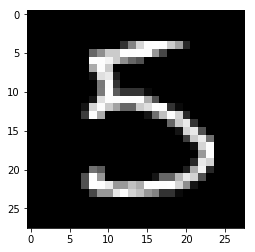

In [5]:
# Displaying a single image

imageId = 15
viewImageByIndex(data, imageId)

In [6]:
from sklearn import linear_model

class estimatorWrapper(linear_model.LogisticRegression):
    def __init__(self, t, lr):
        self.lr = lr
        self.t = t
        
    def fit(self, X, y):
        self.lr.fit(X,y)
    
    def predict(self, xVal):
        predProb = self.lr.predict_proba(xVal)
        
        ret = []
        
        def choice(p):
            retVal = 0
            if p[1] > self.t:
                retVal = 1
            return retVal
            
        for p in predProb:
            ret.append(choice(p))
        
        return ret

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

def evaluation(s):
    return np.exp(s)/(1+np.exp(s))

evaluation_vector=np.vectorize(evaluation)

def affine(x,a,b):
    return x*a+b

affine_vector=np.vectorize(affine)
data = get_mnist_data()
digits=np.array([0,1,2,7,3,4,8,9])
digits=digits.reshape(4,2)
digits

array([[0, 1],
       [2, 7],
       [3, 4],
       [8, 9]])

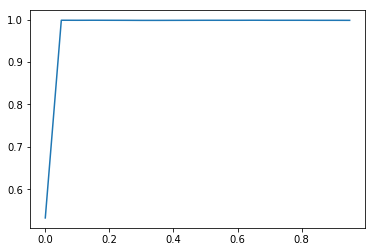

0.15000000000000002
0.9995271867612293
Label: 1


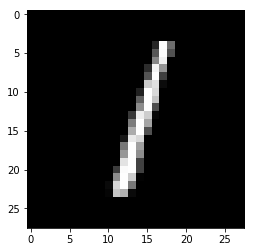

Label: 0


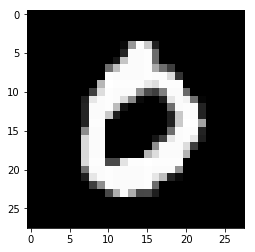

Label: 1


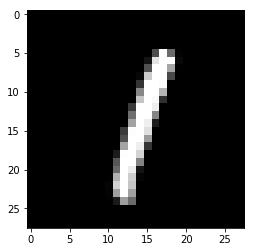

Label: 0


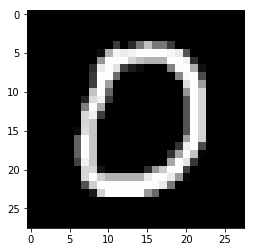

Label: 0


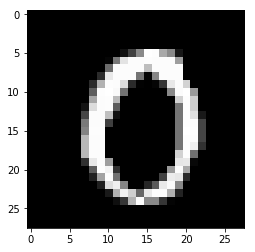

Label: 0


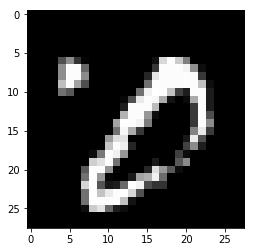

['Wrongly labelled as:', 1]
Label: 


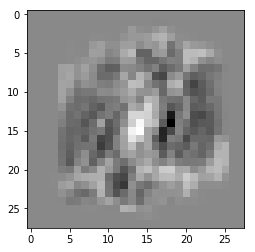

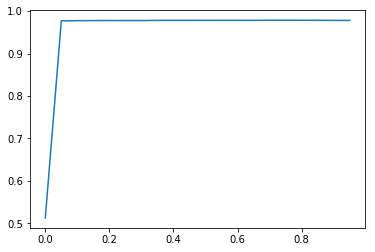

0.7000000000000001
0.9669902912621359
Label: 7


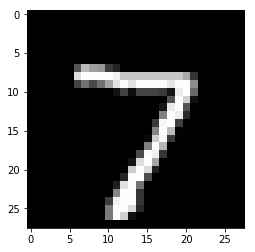

Label: 2


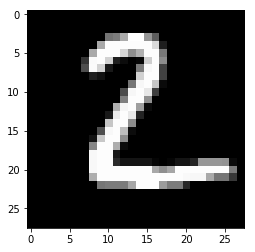

Label: 7


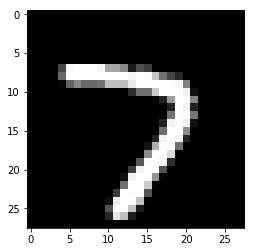

Label: 7


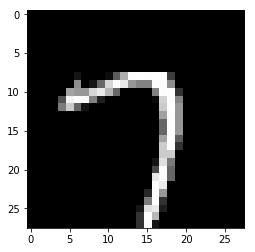

Label: 7


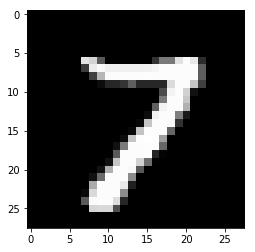

Label: 2


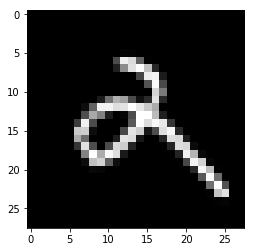

['Wrongly labelled as:', 7]
Label: 


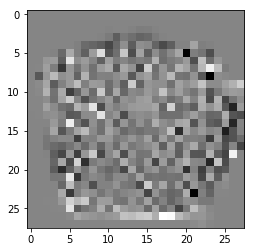

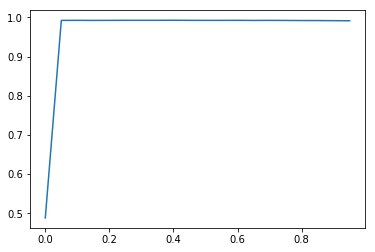

0.4
0.9934738955823293
Label: 4


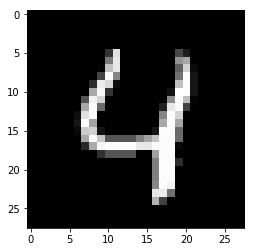

Label: 4


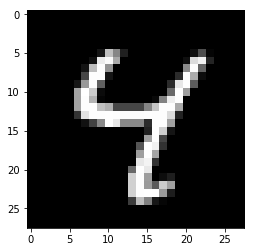

Label: 3


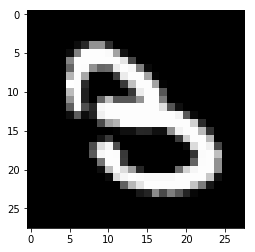

Label: 4


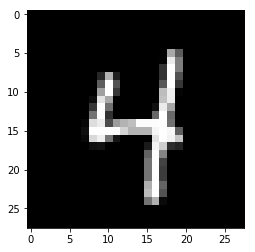

Label: 4


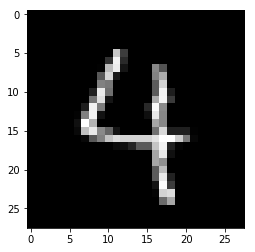

Label: 4


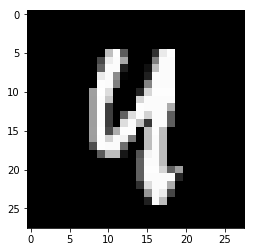

['Wrongly labelled as:', 3]
Label: 


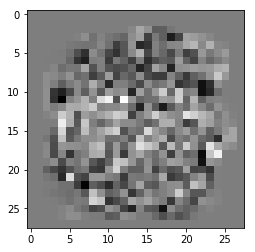

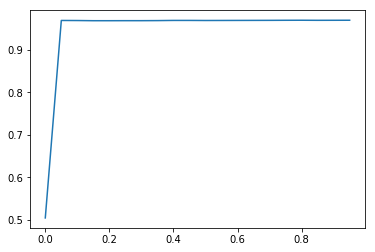

0.9500000000000001
0.9652042360060514
Label: 9


C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


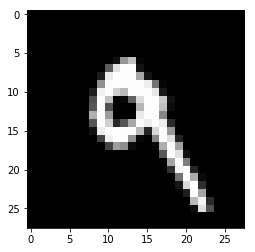

Label: 9


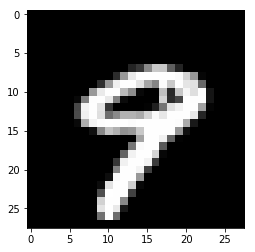

Label: 9


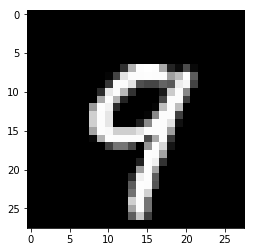

Label: 9


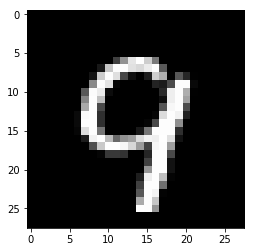

Label: 9


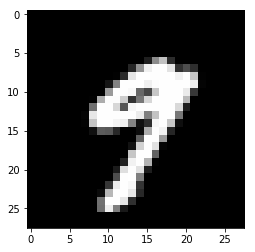

Label: 9


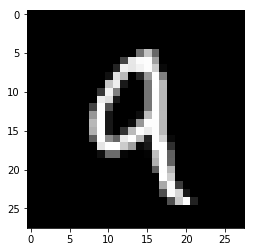

['Wrongly labelled as:', 8]
Label: 


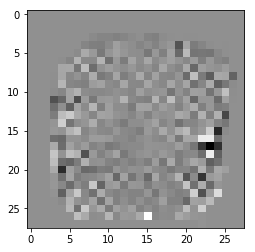

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import cross_val_score

for i in range(0,4):
    digits_0 = digits[i][0] #extragem primul digit
    digits_1 = digits[i][1] #extragem cel de-al doilea digit
    digits_train_X = data['train']['X'][(data['train']['y'] == digits_0)|(data['train']['y'] == digits_1)]
    digits_train_y_a = data['train']['y'][(data['train']['y'] == digits_0)|(data['train']['y'] == digits_1)]
    digits_test_X = data['test']['X'][(data['test']['y'] == digits_0)|(data['test']['y'] == digits_1)]
    digits_test_y_a = data['test']['y'][(data['test']['y'] == digits_0)|(data['test']['y'] == digits_1)]
    digits_train_y = affine_vector(digits_train_y_a, 1/(digits_1-digits_0), -digits_0/(digits_1-digits_0))
    digits_test_y = affine_vector(digits_test_y_a,1/(digits_1-digits_0),-digits_0/(digits_1-digits_0))
    
    t_range=np.arange(0.0,1.0,0.05)
    t_scores=[]
    for t in t_range:
        clf=linear_model.LogisticRegression(C=1e5,solver='lbfgs',max_iter=4000)
        pred=estimatorWrapper(t,clf)
        scores=cross_val_score(pred,digits_train_X,digits_train_y,cv=5,scoring='accuracy')
        t_scores.append(scores.mean())
    plt.plot(t_range,t_scores)
    plt.show()
    
    t_scores_arange=np.array(t_scores)
    t_arange=np.array(t_range)
    maximum=t_scores_arange.max()
    i=0
    while (t_scores_arange[i]<maximum):
        i+=1
    t_best=t_arange[i]
    print(t_best)
    
    regression_mod = linear_model.LogisticRegression(C=1e5,solver='lbfgs',max_iter=4000)
    regression_mod.fit(digits_train_X,digits_train_y)
    t=t_best
    regression_model = estimatorWrapper(t,regression_mod)
    print(regression_mod.score(digits_test_X,digits_test_y))
    
    predicted_labels = np.array(regression_model.predict(digits_test_X))
    mat = np.column_stack((digits_test_y,predicted_labels))
    mat_r = mat.transpose()
    df=pd.DataFrame(mat_r)
    df2=df.T
    df2.columns=['A','B']
    correct=df2[df2.A==df2.B]
    ind=correct.index[0:5]
    for i in ind:
        viewSquareImage(digits_test_X[i],int(affine_vector(digits_test_y[i],digits_1-digits_0,digits_0)))
    incorrect=df2[df2.A!=df2.B]
    viewSquareImage(digits_test_X[incorrect.index[0]],int(affine_vector(digits_test_y[incorrect.index[0]],digits_1-digits_0,digits_0)))
    wrong_label=incorrect.iloc[0,1]
    print(["Wrongly labelled as:",int(affine(wrong_label,digits_1-digits_0,digits_0))])
    b=regression_mod.coef_
    viewSquareImage2(b)